# Getting started with pandas

In [1]:
from pandas import Series, DataFrame
import pandas as pd

In [2]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [ ]:
%pwd

In [ ]:
%cd ../book_scripts

## Introduction to pandas data structures

### Series

In [ ]:
obj = Series([4, 7, -5, 3])
obj

In [ ]:
obj.values
obj.index

In [ ]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

In [ ]:
obj2.index

In [ ]:
obj2['a']

In [ ]:
obj2['d'] = 6
obj2[['c', 'a', 'd']]

In [ ]:
obj2[obj2 > 0]

In [ ]:
obj2 * 2

In [ ]:
np.exp(obj2)

In [ ]:
'b' in obj2

In [ ]:
'e' in obj2

In [ ]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
obj3

In [ ]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = Series(sdata, index=states)
obj4

In [ ]:
pd.isnull(obj4)

In [ ]:
pd.notnull(obj4)

In [ ]:
obj4.isnull()

In [ ]:
obj3

In [ ]:
obj4

In [ ]:
obj3 + obj4

In [ ]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

In [ ]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

### DataFrame

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = DataFrame(data)

In [ ]:
frame

In [ ]:
DataFrame(data, columns=['year', 'state', 'pop'])

In [ ]:
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                   index=['one', 'two', 'three', 'four', 'five'])
frame2

In [ ]:
frame2.columns

In [ ]:
frame2['state']

In [ ]:
frame2.year

In [ ]:
frame2.ix['three']

In [ ]:
frame2['debt'] = 16.5
frame2

In [ ]:
frame2['debt'] = np.arange(5.)
frame2

In [ ]:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

In [ ]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

In [ ]:
del frame2['eastern']
frame2.columns

In [ ]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [ ]:
frame3 = DataFrame(pop)
frame3

In [ ]:
frame3.T

In [ ]:
DataFrame(pop, index=[2001, 2002, 2003])

In [ ]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
DataFrame(pdata)

In [ ]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

In [ ]:
frame3.values

In [ ]:
frame2.values

### Index objects

In [ ]:
obj = Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

In [ ]:
index[1:]

In [ ]:
index[1] = 'd'

In [ ]:
index = pd.Index(np.arange(3))
obj2 = Series([1.5, -2.5, 0], index=index)
obj2.index is index

In [ ]:
frame3

In [ ]:
'Ohio' in frame3.columns

In [ ]:
2003 in frame3.index

## Essential functionality

### Reindexing

In [ ]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

In [ ]:
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

In [ ]:
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='ffill')

In [ ]:
frame = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],
                  columns=['Ohio', 'Texas', 'California'])
frame

In [ ]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

In [ ]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

In [ ]:
frame.reindex(index=['a', 'b', 'c', 'd'], method='ffill',
              columns=states)

In [ ]:
frame.ix[['a', 'b', 'c', 'd'], states]

### Dropping entries from an axis

In [ ]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
new_obj = obj.drop('c')
new_obj

In [ ]:
obj.drop(['d', 'c'])

In [ ]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

In [ ]:
data.drop(['Colorado', 'Ohio'])

In [ ]:
data.drop('two', axis=1)

In [ ]:
data.drop(['two', 'four'], axis=1)

### Indexing, selection, and filtering

In [ ]:
obj = Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj['b']

In [ ]:
obj[1]

In [ ]:
obj[2:4]

In [ ]:
obj[['b', 'a', 'd']]

In [ ]:
obj[[1, 3]]

In [ ]:
obj[obj < 2]

In [ ]:
obj['b':'c']

In [ ]:
obj['b':'c'] = 5
obj

In [ ]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

In [ ]:
data['two']

In [ ]:
data[['three', 'one']]

In [ ]:
data[:2]

In [ ]:
data[data['three'] > 5]

In [ ]:
data < 5

In [ ]:
data[data < 5] = 0

In [ ]:
data

In [ ]:
data.ix['Colorado', ['two', 'three']]

In [ ]:
data.ix[['Colorado', 'Utah'], [3, 0, 1]]

In [ ]:
data.ix[2]

In [ ]:
data.ix[:'Utah', 'two']

In [ ]:
data.ix[data.three > 5, :3]

### Arithmetic and data alignment

In [ ]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [ ]:
s1

In [ ]:
s2

In [ ]:
s1 + s2

In [ ]:
df1 = DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                index=['Ohio', 'Texas', 'Colorado'])
df2 = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

In [ ]:
df2

In [ ]:
df1 + df2

#### Arithmetic methods with fill values

In [ ]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
df1

In [ ]:
df2

In [ ]:
df1 + df2

In [ ]:
df1.add(df2, fill_value=0)

In [ ]:
df1.reindex(columns=df2.columns, fill_value=0)

#### Operations between DataFrame and Series

In [ ]:
arr = np.arange(12.).reshape((3, 4))
arr

In [ ]:
arr[0]

In [ ]:
arr - arr[0]

In [ ]:
frame = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.ix[0]
frame

In [ ]:
series

In [ ]:
frame - series

In [ ]:
series2 = Series(range(3), index=['b', 'e', 'f'])
frame + series2

In [ ]:
series3 = frame['d']
frame

In [ ]:
series3

In [ ]:
frame.sub(series3, axis=0)

### Function application and mapping

In [ ]:
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [ ]:
frame

In [ ]:
np.abs(frame)

In [ ]:
f = lambda x: x.max() - x.min()

In [ ]:
frame.apply(f)

In [ ]:
frame.apply(f, axis=1)

In [ ]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

In [ ]:
format = lambda x: '%.2f' % x
frame.applymap(format)

In [ ]:
frame['e'].map(format)

### Sorting and ranking

In [ ]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

In [ ]:
frame = DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],
                  columns=['d', 'a', 'b', 'c'])
frame.sort_index()

In [ ]:
frame.sort_index(axis=1)

In [ ]:
frame.sort_index(axis=1, ascending=False)

In [ ]:
obj = Series([4, 7, -3, 2])
obj.order()

In [ ]:
obj = Series([4, np.nan, 7, np.nan, -3, 2])
obj.order()

In [ ]:
frame = DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

In [ ]:
frame.sort_index(by='b')

In [ ]:
frame.sort_index(by=['a', 'b'])

In [ ]:
obj = Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

In [ ]:
obj.rank(method='first')

In [ ]:
obj.rank(ascending=False, method='max')

In [ ]:
frame = DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                   'c': [-2, 5, 8, -2.5]})
frame

In [ ]:
frame.rank(axis=1)

### Axis indexes with duplicate values

In [ ]:
obj = Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

In [ ]:
obj.index.is_unique

In [ ]:
obj['a']

In [ ]:
obj['c']

In [ ]:
df = DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

In [ ]:
df.ix['b']

## Summarizing and computing descriptive statistics

In [ ]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5],
                [np.nan, np.nan], [0.75, -1.3]],
               index=['a', 'b', 'c', 'd'],
               columns=['one', 'two'])
df

In [ ]:
df.sum()

In [ ]:
df.sum(axis=1)

In [ ]:
df.mean(axis=1, skipna=False)

In [ ]:
df.idxmax()

In [ ]:
df.cumsum()

In [ ]:
df.describe()

In [ ]:
obj = Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

### Correlation and covariance

In [ ]:
import pandas.io.data as web

all_data = {}
for ticker in ['159915.SZ', '159902.sz', '399001.sz', '^dji']:
    all_data[ticker] = web.get_data_yahoo(ticker)

In [7]:
price = DataFrame({tic: data['Adj Close']
                   for tic, data in all_data.items()})
volume = DataFrame({tic: data['Volume']
                    for tic, data in all_data.items()})

In [8]:
web.get_data_google?

In [10]:
price

,159902.sz,159915.SZ,399001.sz,^dji
Date,,,,
2010-01-04,2.637,NaN,13533.5,10583.95996
2010-01-05,2.658,NaN,13517.4,10572.01953
2010-01-06,2.656,NaN,13505.2,10573.67969
2010-01-07,2.590,NaN,13235.5,10606.86035
2010-01-08,2.614,NaN,13267.4,10618.19043
2010-01-11,2.606,NaN,13161.1,10663.99023
2010-01-12,2.674,NaN,13381.2,10627.25977
2010-01-13,2.639,NaN,13016.6,10680.76953
2010-01-14,2.705,NaN,13204.2,10710.54980


In [11]:
priced = price.dropna()

In [37]:
gp = priced.groupby(priced['159902.sz'].cummax())

In [40]:
gp['159902.sz']

In [24]:
%matplotlib inline

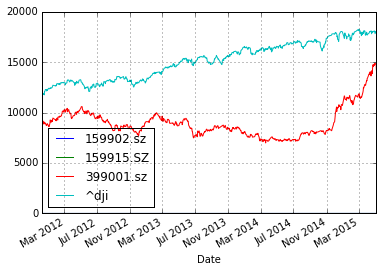

In [25]:
priced.plot()

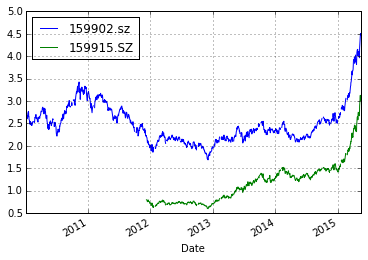

In [28]:
price[['159902.sz','159915.SZ']].plot()

In [23]:
plt.plot([1,2,3,4])

In [13]:
returns = priced.pct_change()
returns.tail()

,159902.sz,159915.SZ,399001.sz,^dji
Date,,,,
2015-04-28,-0.032972,-0.025283,-0.006901,0.004001
2015-04-29,0.021404,0.054201,0.011205,-0.004120
2015-04-30,-0.006823,0.009181,-0.003591,-0.010813
2015-05-04,0.005643,-0.002911,0.002828,0.012885
2015-05-05,-0.025372,-0.025547,-0.042219,-0.007869


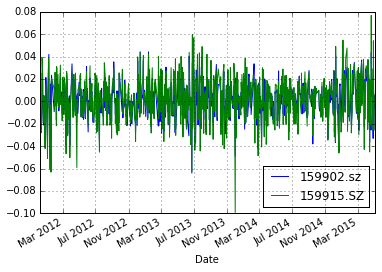

In [32]:
returns[['159902.sz','159915.SZ']].plot()

In [ ]:
returns.MSFT.cov(returns.IBM)

In [14]:
returns.corr()

,159902.sz,159915.SZ,399001.sz,^dji
159902.sz,1.000000,0.860517,0.796451,0.006660
159915.SZ,0.860517,1.000000,0.574445,-0.013030
399001.sz,0.796451,0.574445,1.000000,0.022482
^dji,0.006660,-0.013030,0.022482,1.000000


In [18]:
returns.cov().set_index('^dji',append = True)

,,159902.sz,159915.SZ,399001.sz
,^dji,,,
159902.sz,0.000001,0.000234,0.000256,0.000177
159915.SZ,-0.000002,0.000256,0.000378,0.000162
399001.sz,0.000002,0.000177,0.000162,0.000211
^dji,0.000054,0.000001,-0.000002,0.000002


In [ ]:
returns.corrwith(returns.IBM)

In [16]:
returns.corrwith(volume.dropna())

159902.sz    0.151759
159915.SZ    0.143557
399001.sz         NaN
^dji        -0.044514
dtype: float64

### Unique values, value counts, and membership

In [ ]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [ ]:
uniques = obj.unique()
uniques

In [ ]:
obj.value_counts()

In [ ]:
pd.value_counts(obj.values, sort=False)

In [ ]:
mask = obj.isin(['b', 'c'])
mask

In [ ]:
obj[mask]

In [ ]:
data = DataFrame({'Qu1': [1, 3, 4, 3, 4],
                  'Qu2': [2, 3, 1, 2, 3],
                  'Qu3': [1, 5, 2, 4, 4]})
data

In [ ]:
result = data.apply(pd.value_counts).fillna(0)
result

## Handling missing data

In [ ]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

In [ ]:
string_data.isnull()

In [ ]:
string_data[0] = None
string_data.isnull()

### Filtering out missing data

In [ ]:
from numpy import nan as NA
data = Series([1, NA, 3.5, NA, 7])
data.dropna()

In [ ]:
data[data.notnull()]

In [ ]:
data = DataFrame([[1., 6.5, 3.], [1., NA, NA],
                  [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
data

In [ ]:
cleaned

In [ ]:
data.dropna(how='all')

In [ ]:
data[4] = NA
data

In [ ]:
data.dropna(axis=1, how='all')

In [ ]:
df = DataFrame(np.random.randn(7, 3))
df.ix[:4, 1] = NA; df.ix[:2, 2] = NA
df

In [ ]:
df.dropna(thresh=3)

### Filling in missing data

In [ ]:
df.fillna(0)

In [ ]:
df.fillna({1: 0.5, 3: -1})

In [ ]:
# always returns a reference to the filled object
_ = df.fillna(0, inplace=True)
df

In [ ]:
df = DataFrame(np.random.randn(6, 3))
df.ix[2:, 1] = NA; df.ix[4:, 2] = NA
df

In [ ]:
df.fillna(method='ffill')

In [ ]:
df.fillna(method='ffill', limit=2)

In [ ]:
data = Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

## Hierarchical indexing

In [ ]:
data = Series(np.random.randn(10),
              index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
                     [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])
data

In [ ]:
data.index

In [ ]:
data['b']

In [ ]:
data['b':'c']

In [ ]:
data.ix[['b', 'd']]

In [ ]:
data[:, 2]

In [ ]:
data.unstack()

In [ ]:
data.unstack().stack()

In [ ]:
frame = DataFrame(np.arange(12).reshape((4, 3)),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=[['Ohio', 'Ohio', 'Colorado'],
                           ['Green', 'Red', 'Green']])
frame

In [ ]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

In [ ]:
frame['Ohio']

### Reordering and sorting levels

In [ ]:
frame.swaplevel('key1', 'key2')

In [ ]:
frame.sortlevel(1)

In [ ]:
frame.swaplevel(0, 1).sortlevel(0)

### Summary statistics by level

In [ ]:
frame.sum(level='key2')

In [ ]:
frame.sum(level='color', axis=1)

### Using a DataFrame's columns

In [ ]:
frame = DataFrame({'a': range(7), 'b': range(7, 0, -1),
                   'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                   'd': [0, 1, 2, 0, 1, 2, 3]})
frame

In [ ]:
frame2 = frame.set_index(['c', 'd'])
frame2

In [ ]:
frame.set_index(['c', 'd'], drop=False)

In [ ]:
frame2.reset_index()

## Other pandas topics

### Integer indexing

In [ ]:
ser = Series(np.arange(3.))
ser.iloc[-1]

In [ ]:
ser

In [ ]:
ser2 = Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

In [ ]:
ser.ix[:1]

In [ ]:
ser3 = Series(range(3), index=[-5, 1, 3])
ser3.iloc[2]

In [ ]:
frame = DataFrame(np.arange(6).reshape((3, 2)), index=[2, 0, 1])
frame.iloc[0]

### Panel data

In [ ]:
import pandas.io.data as web

pdata = pd.Panel(dict((stk, web.get_data_yahoo(stk))
                       for stk in ['AAPL', 'GOOG', 'MSFT', 'DELL']))

In [ ]:
pdata

In [ ]:
pdata = pdata.swapaxes('items', 'minor')
pdata['Adj Close']

In [ ]:
pdata.ix[:, '6/1/2012', :]

In [ ]:
pdata.ix['Adj Close', '5/22/2012':, :]

In [ ]:
stacked = pdata.ix[:, '5/30/2012':, :].to_frame()
stacked

In [ ]:
stacked.to_panel()